# PIP + Console

In [ ]:
!pip install visualkeras

# Imports

In [ ]:
import keras
import visualkeras

from numpy import loadtxt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten

# Initialisation

In [ ]:
class DataSet:
    'Dataset class, contains numpy dataset and reformatting functions'
    def __init__(self, source : str):
        self.source = source
        self.data = loadtxt(self.source, delimiter=',')


    def dis(self):
        'Displays the dataset in console'
        print(self.data)

In [ ]:
class NeuralNet:
    'The main neural net class, contains building and prediction functions'

    def __init__(self, directory: str, loadQ=None):
        'Directory = directory to the csv file, loadQ = keras model to boot from, requires directory to run eval functions'
        self.model = None
        self.directory: str = directory
        self.bounds: int = len(loadtxt(directory, delimiter=",")[0]) - 1
        self.dataset = DataSet(directory)

        if loadQ:
            self.model = keras.models.load_model(loadQ)

    def build_base(self, d1=12, d2=8, d3=1, a1="relu", a2="relu", a3="sigmoid"):
        'Defines a basic sequential keras model in a [[0,12], [0,8], [0,1]] shape'
        model = Sequential()
        model.add(Dense(d1, input_shape=(self.bounds,), activation=a1))
        model.add(Dense(d2, activation=a2))
        model.add(Dense(d3, activation=a3))

        self.model = model

    def compile(self):
        'Compiles the model for training and/or prediction'
        self.model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

    #

    def train(self, epochs: int=150, batch_size: int =10, verbose: int=0):
        'Fits the created model to the dataset'
        dataset = self.dataset.data

        # splits the dataset into input (X) and output (y) datasets based of the length of the csv file
        X = dataset[:, 0:self.bounds]
        y = dataset[:, self.bounds]

        # fits the keras model on the datasets
        self.model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=verbose)

    # Custom construction functions

    def init_model(self):
        'Defines model as Sequential'
        model = Sequential()
        self.model = model

    def add_dense(self, dim: int=12, act: str="relu"):
        self.model.add(Dense(dim, input_shape=(self.bounds,), activation=act))

    # Model save and load functions

    def save(self, name: str="model.keras"):
        'Saves keras model'
        self.model.save(name)

    def load(self, name: str="model.keras"):
        'Loads model from directory'
        self.model = keras.models.load_model(name)

    # Eval and prediction functions

    def eval(self):
        'Evaluates the models accuracy and loss, returns a tuple'
        dataset = self.dataset.data

        # splits dataset into input (X) and output (y) datasets
        X = dataset[:, 0:self.bounds]
        y = dataset[:, self.bounds]

        # evaluate the keras model
        loss, accuracy = self.model.evaluate(X, y, verbose=0)

        return loss, accuracy

    def predict_csv(self, input_directory: str):
        'Predicts responses from an inputted csv file'

        #  an additional "blank" row filled with zeros may be needed if the csv is 1 row long (edge case)
        x = loadtxt(input_directory, delimiter=",")
        predictions = (self.model.predict(x, verbose=0) > 0.5).astype(int)

        return predictions

    def predict_array(self, array: list):
        'Predicts responses from an array'

        # converting all array items to "str" type for dataset writing
        array = [str(x) for x in array]

        # assembly of dataset
        open('neural_net.csv', 'w').close()
        with open("neural_net.csv", "a") as f:
            f.write(",".join(array) + "\n")
            f.write(("0,"*(len(array)-1)) + "0")
        x = loadtxt("neural_net.csv", delimiter=",")

        predictions = (self.model.predict(x, verbose=0) > 0.5).astype(int)
        return predictions[:-1]

    def visualise(self):
        'Visualises the keras model'
        model=self.model

        visualkeras.layered_view(model).show()

    def summarise(self):
        'Returns a summary of the model'
        self.model.summary()

    def kill(self):
        'Deletes the model object, does NOT save the model in a directory'
        self.model = None

    def ensure_future_main(self, name="future.keras", verbose=0):
        'Deletes the model, but saves it in a directory'

        if verbose:
          self.model.summarise()

        self.model.save(name)
        self.model = None



 # Example - Diabetes

**Source**: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome (Boolean). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.



6,148,72,35,0,33.6,0.627,50, **1**

1,85,66,29,0,26.6,0.351,31, **0**

...

This can be achieved in a couple lines with an accuracy of ***77%*** and low loss.


Files of note in directory:

. **main.py**

. **neural_net.py**

. **diabetes.csv**

**Code**
________

First we import the classes seen above above

In [ ]:
# from neural_net import NeuralNet, DataSet

Then we create the model object with **"diabetes.csv"** as the only parameter

In [ ]:
model = NeuralNet("csvv.csv")

Then we build the main **sequential** keras model with 3 dense layers, where the last layer runs a sigmoid function in order to return Boolean responses.

See above class definition for the exact description of this function.

In [ ]:
model.build_base()

___

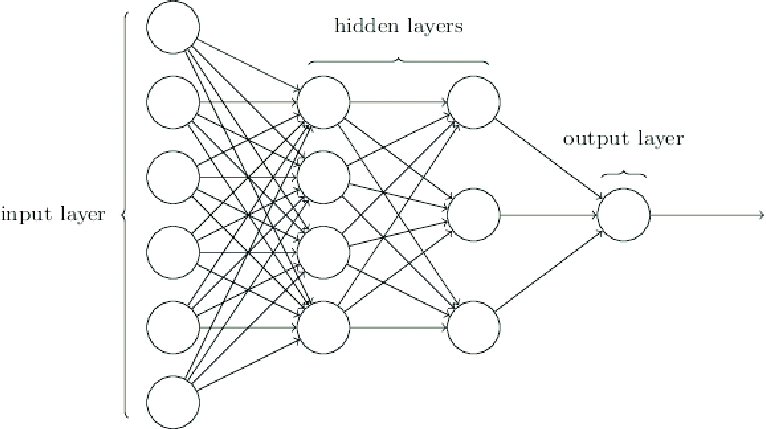

___

Compiles the model

In [ ]:
model.compile()

Fits the model to the dataset.

In [ ]:
model.train()

**Model is complete - You can now predict freely**
____________________________________________________

In [ ]:
model.predict_array([1,89,66,23,94,28.1,0.167,21])

array([[0]])

In [ ]:
o = [False, True]
out = o[(model.predict_array([3,158,76,36,245,31.6,0.851,28]))[0][0]]
print(out)

False


In [ ]:
model.eval()

(0.46018967032432556, 0.7747395634651184)

In [ ]:
model.save("diabetes.keras")

# Example - Breast Cancer

**Source:** https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

Refered to as "**source.csv**" for this example

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign (non cancerous).


**Example**
___

For this dataset we convert the **M** entries to a **1**, for the prescence of cancer, and the **B** entries to a **0** for the lack of. This new column must then be moved to the end of the csv.

This gives our boolean values, as well as removing incorrectly typed values.

Additionaly we can remove the first **"ID""** column, as its potentially extraneous data that may skew results.

Because of these changes, "**source.csv**" goes from a usable too a much easier dataset.  This will be known as "**dataset.csv**"


Files of note in directory:

. **main.py**

. **neural_net.py**

. **source.csv**

. **dataset.csv**

**Code**
___

In [ ]:
framework = NeuralNet("dataset1.csv",)

In [ ]:
framework.build_base()

In [ ]:
framework.compile()

In [ ]:
framework.train()

**Model is complete - You can now predict freely**
____________________________________________________

In [ ]:
array = [17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189]

In [ ]:
r = framework.predict_array(array)[0][0]

In [ ]:
["Benign", "Malignant"][r]

'Malignant'

In [ ]:
framework.save("breastcancer.keras")

# Snippet - Eval + Prediction

**Code Snippet**
___

In [ ]:
m = NeuralNet("csvv.csv",)

In [ ]:
m.build_base()

In [ ]:
m.compile()

In [ ]:
m.train(150,10,0)

In [ ]:
m.eval()

(0.4977461099624634, 0.7630208134651184)

In [ ]:
m.predict_array([6,148,72,35,0,33.6,0.627,50])

array([[1]])

# Snippet - Loading and saving

Using the same dataset as before, we can load from previous models during object initialisation, as if an additional paramater is present after directory definition, it will boot from that model instead; skipping the need for compilation and construction.

**Code Snippet**
___

In [ ]:
# from neural_net import NeuralNet, DataSet

In [ ]:
snippet = NeuralNet("diabetes.csv", "model.keras")

In [ ]:
snippet.predict_array([1,89,66,23,94,28.1,0.167,21])

In [ ]:
snippet.summarise()

# Specific layer addition

Runs off of the breast cancer dataset.

In [ ]:
# from neural_net import NeuralNet, DataSet

In [ ]:
ex = NeuralNet("dataset1.csv",)

In [ ]:
ex.init_model()

In [ ]:
ex.add_dense(12)

In [ ]:
ex.add_dense(8)

In [ ]:
ex.add_dense(1, "sigmoid")

In [ ]:
ex.compile()

In [ ]:
ex.train()

In [ ]:
ret = ex.predict_array([17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189])

In [ ]:
ret

array([[1]])